Doing the calculations and making the plot for Figure 5 - the JLAT emergent constraint

In [1]:
import importlib
import xarray as xr
import numpy as np
import sys
import matplotlib.pyplot as plt

from ecpaper_utils import linfit_utils as linfit
from ecpaper_utils import bootstrap_utils as boot
from ecpaper_utils import constraint_utils as constraint
from ecpaper_utils import fig_utils as ecfig
from matplotlib.patches import Rectangle

importlib.reload(linfit)
importlib.reload(boot)
importlib.reload(constraint)
importlib.reload(ecfig)

import warnings
warnings.filterwarnings('ignore')


In [2]:
datdir="/project/cas/islas/python/ecpaper2020/DATASORT/SHJET/DATA/"
errordatdir="../ERRORCALC/JLAT/DATA/"

Read in CMIP5 and CMIP6 jet latitude data

In [3]:
cmip5 = xr.open_dataset(datdir+"jlatcmip5.nc")
cmip6 = xr.open_dataset(datdir+"jlatcmip6.nc")
error1mem = xr.open_dataset(errordatdir+"errors_1mem.nc")
errorem5 = xr.open_dataset(errordatdir+"errors_cmip5.nc")
errorem6 = xr.open_dataset(errordatdir+"errors_cmip6.nc")

Read in observational data and group together

In [4]:
obsdata =xr.open_dataset(datdir+"jlatobs.nc")
jlatobs = np.zeros([4])
jlatobs[0] = obsdata.jlatera5 ; jlatobs[1] = obsdata.jlaterai
jlatobs[2] = obsdata.jlatjra ; jlatobs[3] = obsdata.jlatmerra

The CMIP5 emergent constraint

In [5]:
cmip5ols = constraint.dotheconstraint(cmip5['jlatemp'],cmip5['jlatemf']-cmip5['jlatemp'], cmip5['jlat1memp'], cmip5['jlat1memf']-cmip5['jlat1memp'],jlatobs, 
                                     sigyem=errorem5['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='OLS')
cmip5tls = constraint.dotheconstraint(cmip5['jlatemp'],cmip5['jlatemf']-cmip5['jlatemp'], cmip5['jlat1memp'], cmip5['jlat1memf']-cmip5['jlat1memp'],jlatobs, 
                                     sigxem=errorem5['sigx'], sigyem=errorem5['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='TLS')
cmip5bhm = constraint.dotheconstraint(cmip5['jlatemp'],cmip5['jlatemf']-cmip5['jlatemp'], cmip5['jlat1memp'], cmip5['jlat1memf']-cmip5['jlat1memp'],jlatobs, 
                                     sigxem=errorem5['sigx'], sigyem=errorem5['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem5['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


The CMIP6 emergent constraint

In [6]:
cmip6ols = constraint.dotheconstraint(cmip6['jlatemp'],cmip6['jlatemf']-cmip6['jlatemp'], cmip6['jlat1memp'], cmip6['jlat1memf']-cmip6['jlat1memp'],jlatobs, 
                                     sigyem=errorem6['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='OLS')
cmip6tls = constraint.dotheconstraint(cmip6['jlatemp'],cmip6['jlatemf']-cmip6['jlatemp'], cmip6['jlat1memp'], cmip6['jlat1memf']-cmip6['jlat1memp'],jlatobs, 
                                     sigxem=errorem6['sigx'], sigyem=errorem6['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='TLS')
cmip6bhm = constraint.dotheconstraint(cmip6['jlatemp'],cmip6['jlatemf']-cmip6['jlatemp'], cmip6['jlat1memp'], cmip6['jlat1memf']-cmip6['jlat1memp'],jlatobs, 
                                     sigxem=errorem6['sigx'], sigyem=errorem6['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem6['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


The constraint on CMIP5 and CMIP6 combined

In [7]:
cmip56 = xr.concat([cmip5, cmip6], "model" )
errorem56 = xr.concat([errorem5, errorem6],"Model")
cmip56ols = constraint.dotheconstraint(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='OLS')
cmip56tls = constraint.dotheconstraint(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'],method='TLS')
cmip56bhm = constraint.dotheconstraint(cmip56['jlatemp'],cmip56['jlatemf']-cmip56['jlatemp'], cmip56['jlat1memp'], cmip56['jlat1memf']-cmip56['jlat1memp'],jlatobs, 
                                     sigxem=errorem56['sigx'], sigyem=errorem56['sigy'], sigx1mem=error1mem['sigx_1mem'], sigy1mem=error1mem['sigy_1mem'], rxyem=errorem56['rxy'],
                                     rxy1mem=error1mem['rxy_1mem'],method='BHM')

aols, bols = linfit.linfit_xy(cmip56['jlatemp'], cmip56['jlatemf']-cmip56['jlatemp'], sigma=errorem56['sigy'])
atls, btls = linfit.tls(cmip56['jlatemp'], cmip56['jlatemf']-cmip56['jlatemp'], errorem56['sigx'], errorem56['sigy'])
abhmall, bbhmall, del2all, muxall, delx2all = linfit.bhm(cmip56['jlatemp'], cmip56['jlatemf']-cmip56['jlatemp'], errorem56['sigx'], errorem56['sigy'], errorem56['rxy'], iseed=3)
abhm = np.mean(abhmall) ; bbhm = np.mean(bbhmall)

Constraining using OLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using TLS
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while
Constraining using the BHM
starting to calculate the percentiles - this could take a while
calculating the percentage greater than the ensemble mean - this may also take a while


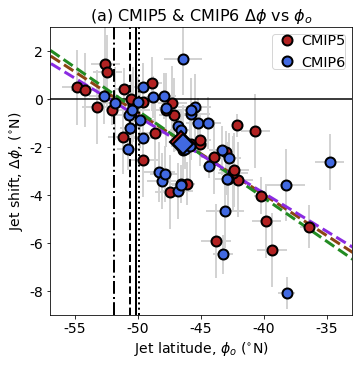

In [8]:
# set up the plot characteristics
#fig, axs = plt.subplots()
#fig.set_size_inches(5,5)
fig = plt.figure()
w=12 ; h=5
fig.set_size_inches(w,h)
ax1 = fig.add_axes(np.array([0.05,0.1,0.35,0.8]))


yerr5 = 1.96*errorem5['sigy'] ; yerr6 = 1.96*errorem6['sigy']
xerr5 = 1.95*errorem5['sigx'] ; xerr6 = 1.95*errorem6['sigy']

ax1 = ecfig.jlatscattersetup(ax1,'(a) CMIP5 & CMIP6 $\Delta \phi$ vs $\phi_{o}$')

# zero line
ax1.plot([-57,-33],[0,0], color="black")

# OLS regression
x = np.arange(-58,-22,1)
y = aols+bols*x
ax1.plot(x,y, color='saddlebrown', linewidth=3, linestyle='dashed')

# TLS regression
y = atls+btls*x
ax1.plot(x,y, color='forestgreen', linewidth=3, linestyle='dashed')

# BHM regression
y = abhm + bbhm*x
ax1.plot(x,y, color='blueviolet', linewidth=3, linestyle='dashed')

# observed values
ax1.plot([obsdata["jlatera5"], obsdata["jlatera5"]],[-9,3], color="black", linewidth=2)
ax1.plot([obsdata["jlaterai"], obsdata["jlaterai"]],[-9,3], color="black", linestyle='dotted', linewidth=2)
ax1.plot([obsdata["jlatjra"], obsdata["jlatjra"]],[-9,3], color="black", linestyle='dashed', linewidth=2)
ax1.plot([obsdata["jlatmerra"], obsdata["jlatmerra"]],[-9,3],color="black", linestyle='dashdot', linewidth=2)

# scatter points and error bars
ax1.plot(cmip5['jlatemp'],cmip5['jlatemf']-cmip5['jlatemp'],"o", markerfacecolor='firebrick', markeredgecolor='black', markersize=10, markeredgewidth=2, label='CMIP5')
ax1.plot(cmip6['jlatemp'],cmip6['jlatemf']-cmip6['jlatemp'],"o", markerfacecolor='royalblue', markeredgecolor='black', markersize=10, markeredgewidth=2, label='CMIP6')

ax1.plot(cmip5['jlatemp'].mean(), cmip5['jlatemf'].mean()-cmip5['jlatemp'].mean(), "D", markerfacecolor='firebrick', markeredgecolor='black', markersize=15, markeredgewidth=2)
ax1.plot(cmip6['jlatemp'].mean(), cmip6['jlatemf'].mean()-cmip6['jlatemp'].mean(), "D", markerfacecolor='royalblue', markeredgecolor='black', markersize=14, markeredgewidth=2)

ax1.errorbar(cmip5['jlatemp'], cmip5['jlatemf']-cmip5['jlatemp'], xerr = xerr5, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip5['jlatemp'], cmip5['jlatemf']-cmip5['jlatemp'], yerr = yerr5, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip6['jlatemp'], cmip6['jlatemf']-cmip6['jlatemp'], xerr = xerr6, linestyle="None", color="lightgray", linewidth=2)
ax1.errorbar(cmip6['jlatemp'], cmip6['jlatemf']-cmip6['jlatemp'], yerr = yerr6, linestyle="None", color="lightgray", linewidth=2)

ax1.legend(handletextpad=0, fontsize='x-large', borderpad=0)




In [11]:
#fig, axs = plt.subplots()
#fig.set_size_inches(3.5,5)
ylim=(-9,3)
ax2 = fig.add_axes(np.array([0.43,0.1,0.23,0.8]))

ax2.set_ylim(ylim)
ax2.set_xlim(-0.5,16.5)
ax2.set_xticks([])
ax2.set_yticks([-8,-6,-4,-2,0,2])
ax2.set_yticklabels(['-8','-6','-4','-2','0','2'], fontsize=14)
ax2.set_title('(b) CMIP5', fontsize=16)

# internal variability range and zero line
ivrange = plt.Rectangle( (-0.5,error1mem['ivmin95']), 17, error1mem['ivmax95']-error1mem['ivmin95'], color='lightgray', zorder=0)
ax2.add_patch(ivrange)
ax2.plot([-0.5,16.5],[0,0], color='black', zorder=1)

jlatdifs = cmip5['jlatemf'] - cmip5['jlatemp']
min66 = np.percentile(jlatdifs, 17)
max66 = np.percentile(jlatdifs, 83)

ax2.plot([-0.5,16.5],[jlatdifs.mean(), jlatdifs.mean()],color='firebrick', zorder=1, linewidth=5)
ax2.plot([-0.5,16.5],[min66, min66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax2.plot([-0.5,16.5],[max66, max66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')

jshiftstring = '{0:6.2f}'.format(np.array(jlatdifs.mean())).strip()
ax2.text(1,-9.3, '$\Delta \phi$=', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
ax2.text(1, -9.8, jshiftstring, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# CMIP5 model points
ax2.plot(np.zeros([cmip5.model.size])+1,cmip5['jlatemf']-cmip5['jlatemp'],"o",markerfacecolor='firebrick',markeredgecolor='black',markersize=10,markeredgewidth=2)
ax2.plot([2.5,2.5],[-9,3], color='black')

# all the emergent constraints info
ax2 = ecfig.plotconstraintinfo(ax2, cmip5ols, cmip5tls, cmip5bhm, ylim, "$\Delta \phi$"")

In [12]:
ax3 = fig.add_axes(np.array([0.69,0.1,0.23,0.8]))

ax3.set_ylim(ylim)
ax3.set_xlim(-0.5,16.5)
ax3.set_xticks([])
ax3.set_yticks([-8,-6,-4,-2,0,2])
ax3.set_yticklabels(['-8','-6','-4','-2','0','2'], fontsize=14)
ax3.set_title('(c) CMIP6', fontsize=16)

# internal variability range and zero line
ivrange = plt.Rectangle( (-0.5,error1mem['ivmin95']), 17, error1mem['ivmax95']-error1mem['ivmin95'], color='lightgray', zorder=0)
ax3.add_patch(ivrange)
ax3.plot([-0.5,16.5],[0,0], color='black', zorder=1)

jlatdifs = cmip6['jlatemf'] - cmip6['jlatemp']
min66 = np.percentile(jlatdifs, 17)
max66 = np.percentile(jlatdifs, 83)

ax3.plot([-0.5,16.5],[jlatdifs.mean(), jlatdifs.mean()],color='royalblue', zorder=1, linewidth=5)
ax3.plot([-0.5,16.5],[min66, min66],color='royalblue', zorder=1, linewidth=3, linestyle='dotted')
ax3.plot([-0.5,16.5],[max66, max66],color='royalblue', zorder=1, linewidth=3, linestyle='dotted')

shiftstring = '{0:6.2f}'.format(np.array(jlatdifs.mean())).strip()
ax3.text(1,-9.3, '$\Delta \phi$=', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
ax3.text(1, -9.8, jshiftstring, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# CMIP6 model points
ax3.plot(np.zeros([cmip6.model.size])+1,cmip6['jlatemf']-cmip6['jlatemp'],"o",markerfacecolor='royalblue',markeredgecolor='black',markersize=10,markeredgewidth=2)
ax3.plot([2.5,2.5],[-9,3], color='black')

# all the emergent constraints info
ax3 = ecfig.plotconstraintinfo(ax3, cmip6ols, cmip6tls, cmip6bhm, ylim, "$\Delta \phi$")

In [13]:
ax4 = fig.add_axes(np.array([0.95,0.1,0.23,0.8]))

ax4.set_ylim(ylim)
ax4.set_xlim(-0.5,16.5)
ax4.set_xticks([])
ax4.set_yticks([-8,-6,-4,-2,0,2])
ax4.set_yticklabels(['-8','-6','-4','-2','0','2'], fontsize=14)
ax4.set_title('(d) CMIP56', fontsize=16)

# internal variability range and zero line
ivrange = plt.Rectangle( (-0.5,error1mem['ivmin95']), 17, error1mem['ivmax95']-error1mem['ivmin95'], color='lightgray', zorder=0)
ax4.add_patch(ivrange)
ax4.plot([-0.5,16.5],[0,0], color='black', zorder=1)

jlatdifs = cmip56['jlatemf'] - cmip56['jlatemp']
min66 = np.percentile(jlatdifs, 17)
max66 = np.percentile(jlatdifs, 83)

ax4.plot([-0.5,16.5],[jlatdifs.mean(), jlatdifs.mean()],color='royalblue', zorder=1, linewidth=5)
ax4.plot([-0.45,16.5],[jlatdifs.mean(), jlatdifs.mean()],color='firebrick', zorder=1, linewidth=5, linestyle='dotted')
ax4.plot([-0.5,16.5],[min66, min66],color='royalblue', zorder=1, linewidth=3, linestyle='dashed')
ax4.plot([-0.5,16.5],[min66, min66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')
ax4.plot([-0.5,16.5],[max66, max66],color='royalblue', zorder=1, linewidth=3, linestyle='dashed')
ax4.plot([-0.5,16.5],[max66, max66],color='firebrick', zorder=1, linewidth=3, linestyle='dotted')

shiftstring = '{0:6.2f}'.format(np.array(jlatdifs.mean())).strip()
ax4.text(1,-9.3, '$\Delta \phi$=', horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')
ax4.text(1, -9.8, jshiftstring, horizontalalignment='center', verticalalignment='center', fontsize=10, color='black')

# CMIP5 and 6 model points
ax4.plot(np.zeros([cmip5.model.size])+0.4,cmip5['jlatemf']-cmip5['jlatemp'],"o",markerfacecolor='firebrick',markeredgecolor='black',markersize=10,markeredgewidth=2)
ax4.plot(np.zeros([cmip6.model.size])+1.6,cmip6['jlatemf']-cmip6['jlatemp'],"o",markerfacecolor='royalblue',markeredgecolor='black',markersize=10,markeredgewidth=2)
ax4.plot([2.5,2.5],[-9,3], color='black')

# all the emergent constraints info
ax4 = ecfig.plotconstraintinfo(ax4, cmip56ols, cmip56tls, cmip56bhm, ylim, "$\Delta \phi$")

In [14]:
# the legend
legendparts=[Rectangle((0.95,0.95),5,3,facecolor='saddlebrown'),
             Rectangle((0.95,0.95),5,3,facecolor='forestgreen'),
             Rectangle((0.95,0.95),5,3,facecolor='blueviolet')]

legendlabels=['OLS','TLS','BHM']
fig.legend(legendparts, legendlabels, bbox_to_anchor=(0.95, 0.05), ncol=3, frameon=False, fontsize='x-large', handlelength=1, handleheight=1, handletextpad=0.4)






In [15]:
fig.patch.set_facecolor('white')
fig
fig.savefig('fig5.png', facecolor='white', bbox_inches='tight')